In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams["text.usetex"] = True

In [ ]:
run = Path("../runs/ppo/mixed_training_smoothness_2025-05-20_06-47-01")

In [4]:
train_csv = run / "train.csv"
eval_csv = run / "eval.csv"
train_df = pd.read_csv(train_csv)
eval_df = pd.read_csv(eval_csv)

In [5]:
train_df.keys(), eval_df.keys()

(Index(['collected_frames', 'train/mean_action_sample_log_prob',
        'train/mean_critic_loss', 'train/mean_objective_loss',
        'train/mean_entropy_loss', 'train/mean_entropy', 'train/mean_kl_approx',
        'train/mean_clip_fraction', 'train/mean_advantage',
        'train/std_advantage', 'train/total_grad_norm',
        'train/policy_operator_lr', 'train/value_operator_lr'],
       dtype='object'),
 Index(['collected_frames', 'eval/mean_step_reward', 'eval/max_step_reward',
        'eval/min_step_reward', 'eval/mean_step_count', 'eval/max_step_count',
        'eval/min_step_count', 'eval/pct_succeeded', 'eval/pct_failed',
        'eval/pct_truncated', 'eval/mean_raw_step_reward',
        'eval/max_raw_step_reward', 'eval/min_raw_step_reward'],
       dtype='object'))

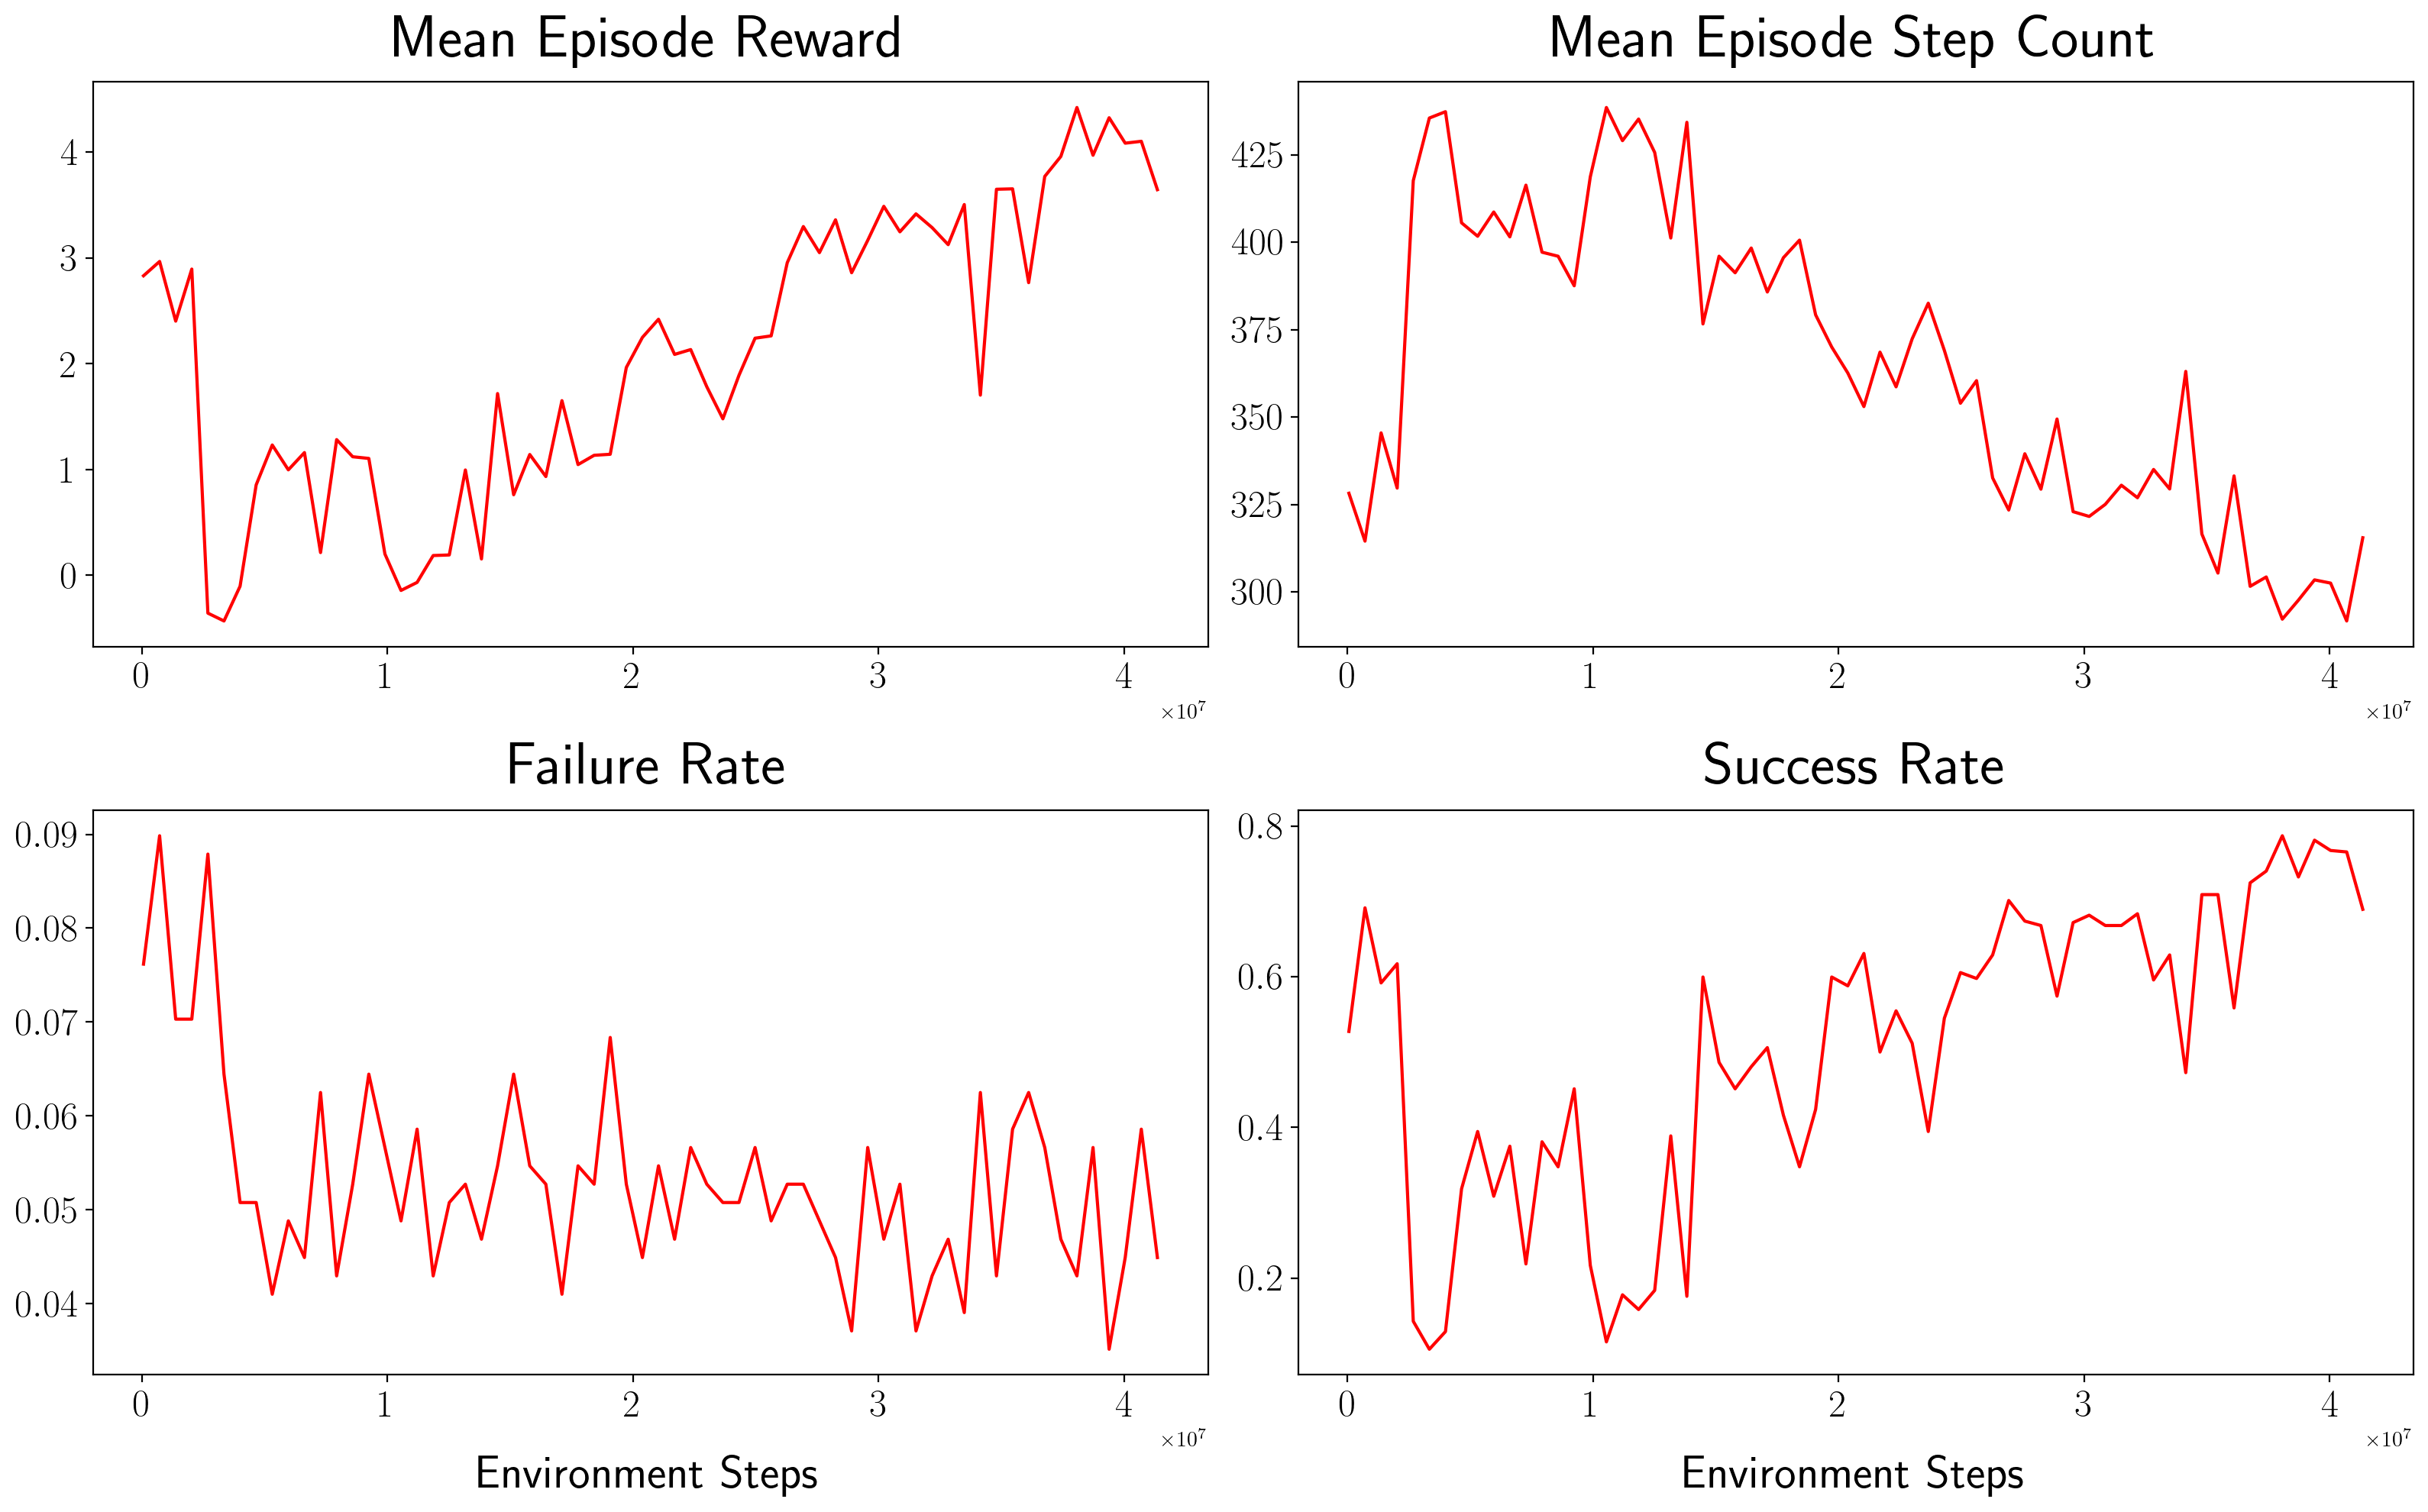

In [12]:
# we want to show eval mean episode length, failure rate, and success rate
# for train we want the action log prob, mean advantage and mean kl divergence
fig, ax = plt.subplots(2, 2, figsize=(16, 10), dpi=200)
# row0: train metrics; row1: step count; row2: fail/success
# best run
ax[0, 0].plot(eval_df["collected_frames"], eval_df["eval/mean_raw_step_reward"], label="Best", color="red")
ax[0, 1].plot(eval_df["collected_frames"], eval_df["eval/mean_step_count"], label="Best", color="red")
ax[1, 0].plot(eval_df["collected_frames"], eval_df["eval/pct_failed"], label="Best", color="red")
ax[1, 1].plot(eval_df["collected_frames"], eval_df["eval/pct_succeeded"], label="Best", color="red")

ax[0, 0].set_title("Mean Episode Reward", fontsize=28, pad=12)
ax[0, 0].set_xlabel("")
ax[0, 0].set_ylabel("")


ax[0, 1].set_title("Mean Episode Step Count", fontsize=28, pad=12)
ax[0, 1].set_xlabel("")
ax[0, 1].set_ylabel("")


ax[1, 0].set_title("Failure Rate", fontsize=28, pad=12)
ax[1, 0].set_xlabel("Environment Steps", fontsize=22, labelpad=15)
ax[1, 0].set_ylabel("")

ax[1, 1].set_title("Success Rate", fontsize=28, pad=12)
ax[1, 1].set_xlabel("Environment Steps", fontsize=22, labelpad=15)
ax[1, 1].set_ylabel("")
for row in ax:
    for a in row:
        a.tick_params(axis="both", which="major", labelsize=18)
        a.tick_params(axis="both", which="minor", labelsize=16)

plt.subplots_adjust(wspace=0.25, hspace=0.35)
plt.tight_layout()

plt.show()

In [13]:
eval_df["eval/pct_succeeded"].iloc[-1]

np.float64(0.689453125)